In [1]:
import cv2
import torch
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from datasets import load_dataset

In [3]:
dataset = load_dataset("food101")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 75750
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 25250
    })
})

In [5]:
dataset['train'].features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lo

In [6]:
print("Training   set :",len(dataset["train"]))
print("Validation set :",len(dataset['validation']))

Training   set : 75750
Validation set : 25250


In [7]:
dataset["train"][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512>,
 'label': 6}

In [8]:
id2label = {}
for i, label in enumerate(dataset["train"].features["label"].names):
    id2label[i] = label

In [9]:
id2label

{0: 'apple_pie',
 1: 'baby_back_ribs',
 2: 'baklava',
 3: 'beef_carpaccio',
 4: 'beef_tartare',
 5: 'beet_salad',
 6: 'beignets',
 7: 'bibimbap',
 8: 'bread_pudding',
 9: 'breakfast_burrito',
 10: 'bruschetta',
 11: 'caesar_salad',
 12: 'cannoli',
 13: 'caprese_salad',
 14: 'carrot_cake',
 15: 'ceviche',
 16: 'cheesecake',
 17: 'cheese_plate',
 18: 'chicken_curry',
 19: 'chicken_quesadilla',
 20: 'chicken_wings',
 21: 'chocolate_cake',
 22: 'chocolate_mousse',
 23: 'churros',
 24: 'clam_chowder',
 25: 'club_sandwich',
 26: 'crab_cakes',
 27: 'creme_brulee',
 28: 'croque_madame',
 29: 'cup_cakes',
 30: 'deviled_eggs',
 31: 'donuts',
 32: 'dumplings',
 33: 'edamame',
 34: 'eggs_benedict',
 35: 'escargots',
 36: 'falafel',
 37: 'filet_mignon',
 38: 'fish_and_chips',
 39: 'foie_gras',
 40: 'french_fries',
 41: 'french_onion_soup',
 42: 'french_toast',
 43: 'fried_calamari',
 44: 'fried_rice',
 45: 'frozen_yogurt',
 46: 'garlic_bread',
 47: 'gnocchi',
 48: 'greek_salad',
 49: 'grilled_chees

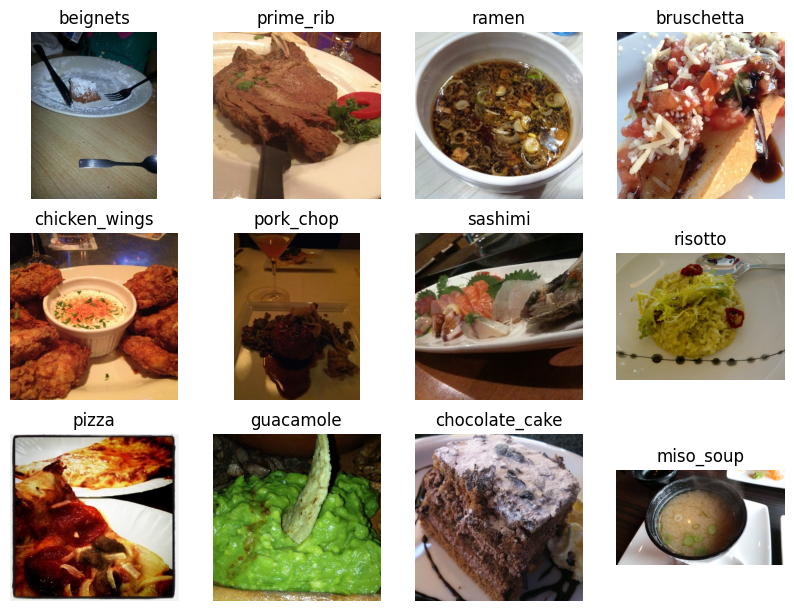

In [10]:
rows = 4
cols = 4
fig = plt.figure(figsize=(10,10))
c = 0 
for i in range(0, 12000,1000):
    ax =fig.add_subplot(rows, cols, c+1)
    image = dataset["train"][i]["image"]
    plt.imshow(image)
    plt.axis('off')
    plt.title(id2label[dataset["train"][i]["label"]])
    c+=1
plt.show()

**_Load Pre-trained Model_**

In [11]:
from transformers import AutoFeatureExtractor, AutoModel

In [12]:
model_name   = "nateraw/food"
model_name2  = "Neruoy/swin-finetuned-food101-e3"
model_name23 = "eslamxm/vit-base-food101"

In [13]:
extractor = AutoFeatureExtractor.from_pretrained(model_name)

c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [14]:
model = AutoModel.from_pretrained(model_name)
hidden_dim = model.config.hidden_size

c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of ViTModel were not initialized from the model checkpoint at nateraw/food and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [16]:
model.eval()

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation(

In [17]:
num_samples = 1000
seed = 42
candidate_subset = dataset["train"].shuffle(seed=seed).select(range(num_samples))

In [18]:
candidate_subset

Dataset({
    features: ['image', 'label'],
    num_rows: 1000
})

In [19]:
import torchvision.transforms as T

In [20]:
extractor.size["height"]

224

In [21]:
# Image transformation
transformation_chain = T.Compose(
    [
        # Resize the image to 256x256 and then take center crop
        T.Resize(int((256 / 224) * extractor.size["height"])),
        T.CenterCrop(extractor.size["height"]),
        T.ToTensor(),
        T.Normalize(mean=extractor.image_mean, std=extractor.image_std),
    ]
)

In [22]:
def extract_embeddings(model: torch.nn.Module):
    """Utility to compute embeddings."""
    device = model.device

    def extract(batch):
        images = batch["image"]
        image_batch_transformed = torch.stack(
            [transformation_chain(image) for image in images]
        )
        new_batch = {"pixel_values": image_batch_transformed.to(device)}
        with torch.no_grad():
            embeddings = model(**new_batch).last_hidden_state[:, 0].cpu()
        return {"embeddings": embeddings}

    return extract

In [23]:
############# Creating Embedding Database #####################
# Map embedding extraction utility on our subset of candidate images
batch_size = 24
device = "cuda" if torch.cuda.is_available() else "cpu"
extract_fn = extract_embeddings(model.to(device))
candidate_subset_emb = candidate_subset.map(extract_fn, batched=True, batch_size=24)

Map: 100%|██████████| 1000/1000 [00:13<00:00, 75.67 examples/s]


In [24]:
candidate_subset_emb['label']

[74,
 71,
 73,
 16,
 63,
 58,
 51,
 52,
 36,
 60,
 27,
 37,
 3,
 41,
 94,
 57,
 28,
 26,
 88,
 37,
 12,
 77,
 94,
 90,
 95,
 60,
 81,
 2,
 33,
 86,
 62,
 83,
 93,
 63,
 14,
 20,
 31,
 35,
 58,
 61,
 32,
 72,
 31,
 13,
 74,
 80,
 82,
 94,
 76,
 31,
 28,
 15,
 23,
 40,
 72,
 32,
 98,
 49,
 3,
 62,
 89,
 96,
 73,
 91,
 76,
 80,
 90,
 61,
 77,
 60,
 24,
 8,
 30,
 50,
 82,
 23,
 15,
 70,
 85,
 57,
 87,
 29,
 64,
 9,
 99,
 4,
 39,
 57,
 9,
 55,
 68,
 39,
 66,
 52,
 22,
 55,
 73,
 53,
 41,
 61,
 22,
 43,
 99,
 25,
 14,
 12,
 67,
 87,
 25,
 92,
 57,
 84,
 7,
 31,
 56,
 54,
 35,
 72,
 70,
 83,
 23,
 54,
 24,
 31,
 2,
 79,
 79,
 38,
 74,
 32,
 18,
 0,
 83,
 34,
 56,
 100,
 59,
 32,
 47,
 29,
 59,
 73,
 88,
 13,
 12,
 1,
 17,
 69,
 56,
 66,
 15,
 9,
 38,
 12,
 87,
 5,
 58,
 4,
 54,
 100,
 16,
 12,
 77,
 92,
 16,
 82,
 11,
 10,
 52,
 53,
 0,
 76,
 94,
 0,
 67,
 49,
 51,
 64,
 90,
 44,
 3,
 48,
 82,
 7,
 62,
 99,
 2,
 26,
 88,
 89,
 77,
 60,
 66,
 86,
 8,
 63,
 37,
 11,
 19,
 13,
 95,
 57,
 59,
 47

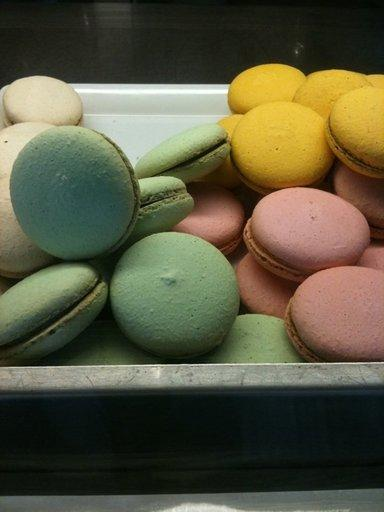

In [25]:
candidate_subset_emb['image'][4]

In [26]:
x = candidate_subset_emb['image'][0]

In [27]:
transformation_chain(x)

tensor([[[ 0.0588,  0.0588,  0.1294,  ...,  0.1451,  0.1608,  0.1608],
         [ 0.0902,  0.0824,  0.1373,  ...,  0.1765,  0.1843,  0.1765],
         [ 0.1373,  0.1765,  0.2078,  ...,  0.1843,  0.1922,  0.1843],
         ...,
         [-0.4510, -0.4431, -0.4039,  ...,  0.1294,  0.1294,  0.1294],
         [-0.4745, -0.4275, -0.3961,  ...,  0.1137,  0.1294,  0.1294],
         [-0.4588, -0.4745, -0.4353,  ...,  0.1059,  0.1059,  0.0980]],

        [[ 0.2392,  0.2314,  0.2863,  ...,  0.2784,  0.2784,  0.2627],
         [ 0.2627,  0.2392,  0.2706,  ...,  0.2863,  0.2863,  0.2784],
         [ 0.2784,  0.3020,  0.3176,  ...,  0.2784,  0.2941,  0.2863],
         ...,
         [-0.7020, -0.7020, -0.6627,  ...,  0.1294,  0.1294,  0.1294],
         [-0.7255, -0.6784, -0.6627,  ...,  0.1216,  0.1294,  0.1294],
         [-0.7176, -0.7412, -0.7098,  ...,  0.1137,  0.1137,  0.1059]],

        [[ 0.3412,  0.3412,  0.3961,  ...,  0.3412,  0.3412,  0.3255],
         [ 0.3569,  0.3333,  0.3647,  ...,  0

In [28]:
extract_fn = extract_embeddings(model.to(device))

In [29]:
candidate_ids = []

for id in tqdm(range(len(candidate_subset_emb))):
    label = candidate_subset_emb[id]["label"]

    # Create a unique indentifier.
    entry = str(id) + "_" + str(label)
    candidate_ids.append(entry)

print("Sample indexing: ", candidate_ids[0])

100%|██████████| 1000/1000 [00:01<00:00, 723.76it/s]

Sample indexing:  0_74


#transform arrap to tensor

In [30]:
all_candidate_embeddings = np.array(candidate_subset_emb["embeddings"])
all_candidate_embeddings = torch.from_numpy(all_candidate_embeddings)

In [31]:
def compute_scores(emb_one, emb_two):
    """Computes cosine similarity between two vectors."""
    scores = torch.nn.functional.cosine_similarity(emb_one, emb_two)
    return scores.numpy().tolist()

In [32]:
def fetch_similar(image, top_k=5):
    """Fetches the `top_k` similar images with `image` as the query."""
    # Prepare the input query image for embedding computation.
    image_transformed = transformation_chain(image).unsqueeze(0)
    new_batch = {"pixel_values": image_transformed.to(device)}

    # Comute the embedding.
    with torch.no_grad():
        query_embeddings = model(**new_batch).last_hidden_state[:, 0].cpu()

    # Compute similarity scores with all the candidate images at one go.
    # We also create a mapping between the candidate image identifiers
    # and their similarity scores with the query image.
    sim_scores = compute_scores(all_candidate_embeddings, query_embeddings)
    similarity_mapping = dict(zip(candidate_ids, sim_scores))

    # Sort the mapping dictionary and return `top_k` candidates.
    similarity_mapping_sorted = dict(
        sorted(similarity_mapping.items(), key=lambda x: x[1], reverse=True)
    )
    id_entries = list(similarity_mapping_sorted.keys())[:top_k]

    ids = list(map(lambda x: int(x.split("_")[0]), id_entries))
    labels = list(map(lambda x: int(x.split("_")[-1]), id_entries))
    return ids, labels

In [33]:
image_transformed = transformation_chain(candidate_subset_emb['image'][4]).unsqueeze(0)
new_batch = {"pixel_values": image_transformed.to(device)}

In [34]:
new_batch

{'pixel_values': tensor([[[[ 0.7490,  0.7490,  0.7490,  ...,  0.6941,  0.7176,  0.7333],
           [ 0.7569,  0.7490,  0.7490,  ...,  0.7961,  0.8039,  0.8275],
           [ 0.7725,  0.7490,  0.7647,  ...,  0.8667,  0.8510,  0.8510],
           ...,
           [-0.9451, -0.9529, -0.9529,  ..., -0.9608, -0.9529, -0.9373],
           [-0.9608, -0.9608, -0.9608,  ..., -0.9529, -0.9451, -0.9373],
           [-0.9529, -0.9529, -0.9529,  ..., -0.9529, -0.9529, -0.9529]],
 
          [[ 0.6706,  0.6706,  0.6706,  ...,  0.3804,  0.4118,  0.4275],
           [ 0.6784,  0.6706,  0.6706,  ...,  0.4902,  0.5059,  0.5294],
           [ 0.6941,  0.6706,  0.6863,  ...,  0.5608,  0.5529,  0.5608],
           ...,
           [-0.8980, -0.9059, -0.9059,  ..., -0.8667, -0.8588, -0.8431],
           [-0.9137, -0.9137, -0.9137,  ..., -0.8745, -0.8667, -0.8588],
           [-0.9059, -0.9059, -0.9059,  ..., -0.8745, -0.8745, -0.8745]],
 
          [[ 0.3961,  0.3961,  0.3961,  ..., -0.6078, -0.5686, -0.5373

In [35]:
query_embeddings = model(**new_batch).last_hidden_state[:, 0].cpu()

In [36]:
query_embeddings

tensor([[ 1.7334e-01,  1.6295e-01,  2.9152e-01,  1.8525e-01, -1.7174e-01,
         -1.9527e-01,  5.4980e-01,  1.6595e-01, -1.3257e-01, -6.0430e-02,
         -5.0467e-01,  3.0516e-01, -6.2982e-03,  1.3034e-01,  9.0463e-02,
         -3.0595e-01, -4.9729e-01,  6.8636e-01,  1.5557e-01,  3.2166e-01,
         -2.4071e-01, -4.2695e-01,  2.3812e-01,  1.1030e-02,  1.1236e-01,
          5.3537e-01, -1.4861e-01, -4.9442e-01,  8.2996e-01,  7.0543e-02,
          1.1099e-02, -2.0867e-01, -7.1425e-01, -4.3550e-01,  6.1750e-02,
          7.7461e-01, -1.7296e-01, -1.5074e-01,  1.0480e-01,  2.8044e-01,
          3.5630e-01,  1.9082e-01,  3.0616e-02, -3.8900e-01, -4.2868e-01,
         -2.3590e-01, -2.3915e-01, -6.3215e-02, -1.0889e-02, -6.3824e-02,
          5.2491e-02,  6.3236e-01,  1.4922e-01, -5.7175e-01, -3.5241e-01,
          2.3641e-01, -2.1478e-01, -3.2986e-03, -2.3834e-01,  2.6325e-01,
          2.5338e-01, -8.4953e-02, -5.2431e-01, -2.8491e-01,  5.6847e-01,
          2.4957e-01, -1.3714e-01,  1.

In [37]:
query_embeddings2 = model(**new_batch)

In [38]:
query_embeddings2

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1733,  0.1629,  0.2915,  ...,  0.1671, -0.5688, -0.3628],
         [ 0.0835,  0.1229,  0.2861,  ...,  0.2306, -0.3669, -0.4349],
         [ 0.0869,  0.1036,  0.3145,  ...,  0.1999, -0.4405, -0.3562],
         ...,
         [ 0.1056,  0.4305,  0.1472,  ...,  0.0312, -0.5075, -0.5710],
         [ 0.1004,  0.4392,  0.1984,  ...,  0.0357, -0.4751, -0.5662],
         [ 0.1803,  0.4516,  0.1753,  ...,  0.0864, -0.3497, -0.5077]]],
       device='cuda:0', grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-4.1439e-01, -1.3308e-01,  1.4194e-01, -3.9600e-02,  6.3764e-02,
          1.7853e-01,  2.3211e-02, -5.9778e-03, -1.3761e-01, -1.6591e-01,
         -2.4394e-01, -9.8082e-02, -8.9323e-02, -1.2539e-01, -1.0248e-01,
         -2.1378e-02, -2.7603e-01, -1.3179e-01, -2.6449e-01, -1.7004e-01,
          2.9618e-01, -2.4422e-01,  1.3038e-02,  7.3183e-02,  3.4562e-01,
          3.3834e-02,  2.2467e-01,  7.3104e-02,  1.1820e-01, -2.2069

In [39]:
test_idx = np.random.choice(len(dataset["validation"]))

In [59]:
test_idx2 = 15

In [60]:
test_sample = dataset["validation"][test_idx2]["image"]
test_label = dataset["validation"][test_idx2]["label"]
print("Search for - ", test_label)

Search for -  6


In [61]:
sim_ids, sim_labels = fetch_similar(test_sample)
print(f"Query label: {test_label}")
print(f"Top 5 candidate labels: {sim_labels}")

Query label: 6
Top 5 candidate labels: [6, 6, 6, 6, 31]


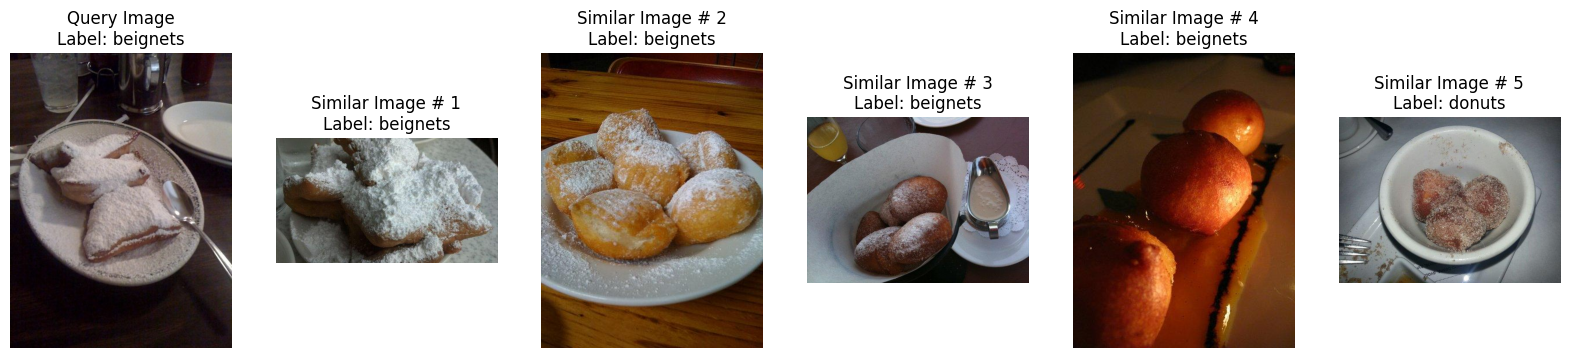

In [62]:
def plot_images(images, labels):
    if not isinstance(labels, list):
        labels = labels.tolist()

    plt.figure(figsize=(20, 10))
    columns = 6
    for (i, image) in enumerate(images):
        label_id = int(labels[i])
        ax = plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + "Label: {}".format(id2label[label_id]))
        else:
            ax.set_title(
                "Similar Image # " + str(i) + "\nLabel: {}".format(id2label[label_id])
            )
        plt.imshow(np.array(image).astype("int"))
        plt.axis("off")


images = []
labels = []

for id, label in zip(sim_ids, sim_labels):
    images.append(candidate_subset_emb[id]["image"])
    labels.append(candidate_subset_emb[id]["label"])

images.insert(0, test_sample)
labels.insert(0, test_label)
plot_images(images, labels)